# Mini projects

## Level 1

### Photo art app

1. Create a function that receives an image and converts it to a sketch so it looks similar to this:
![Example 1](img/sketch.png)

### Instagram filters app

1. Create a function that given a photo it applies a black and white filter
1. Create a filter that will change color of the image 

## Level 2

### Photo art app

1. Change the app so it can now do the same but using your webcam to make it in real time  
**Hint:** you can use ```cv2.VideoCapture(0)```

### Photo correction app

1. Create a funtion to clean *noise* from images
![Noisy image](img/n.png)

### Instagram filters app

1. Create a function that applies a sepia filter to the image, for a BGR image apply this kernel:
        [0.272, 0.534, 0.131],
        [0.349, 0.686, 0.168],
        [0.393, 0.769, 0.189]
        
Get the BGR value of the pixel.
Calculate tr, tg and tb using the formula

tb = 0.272R + 0.534G + 0.131B
tg = 0.349R + 0.686G + 0.168B
tr = 0.393R + 0.769G + 0.189B

Take the integer value.

Set the new RGB value of the pixel as per the following condition:

If tb > 255 then b = 255 else b = tb
If tg > 255 then g = 255 else g = tg
If tr > 255 then r = 255 else r = tr


Example:

Consider a color pixel with the following values

A = 255

R = 100

G = 150

B = 200

Where A, R, G and B represents the Alpha, Red, Green and Blue value of the pixel.

Remember! ARGB will have an integer value in the range 0 to 255.

So, to convert the color pixel into sepia pixel we have to first calculate tr, tg and tb.

tr = 0.393(100) + 0.769(150) + 0.189(200)

tr = 192.45

tr = 192 (taking integer value)

Similarly,

tg = 0.349(100) + 0.686(150) + 0.168(200) = 171 (taking integer value)

and tb = 0.272(100) + 0.534(150) + 0.131(200) = 133 (taking integer value)

## Level 3

### Instagram filters app

1. Apply the sepia filter by using the cv2.transfor function
1. Create different filters from the sepia filter so it renders different images

# More projects

## Handwriting recognition

1. Write a one digit number (from 0 to 9) on a paper and using your mobile phone take a picture of it
1. Crop the image manually and pass it to a a function that will process it so it looks like a char in the MNIST dataset, make sure it is the correct size as well
![4](img/4.png)

1. Pass it through a MNIST classifier and print the prediction on screen

1. Modify the image so now it also contains the predicted result on the image
1. Try it with all digits

In [19]:
import cv2

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [119]:
#read image
path = 'numbers/8.jpg'
img = cv2.imread(path,0)
img.shape

(4032, 3024)

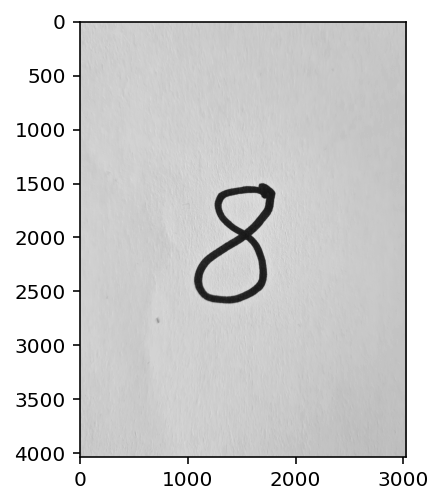

In [120]:
plt.imshow(img, cmap='gray')


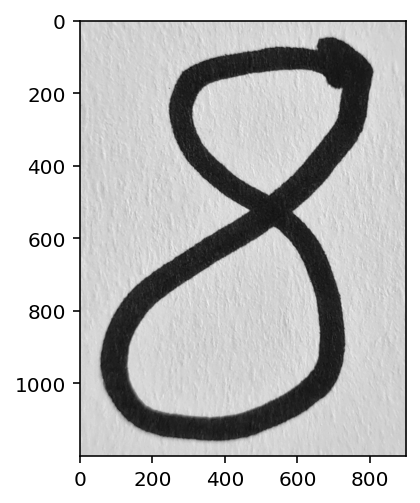

In [121]:

#cropping image

cropped_img = img[1450:2650,1000:1900]
plt.imshow(cropped_img,cmap='gray')


(1200, 900)


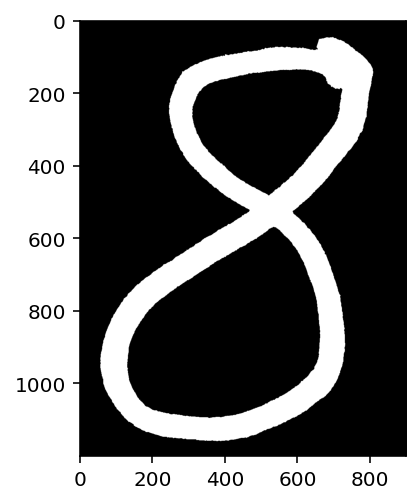

In [122]:
# treshold application

ret, th = cv2.threshold(cropped_img,100,255,cv2.THRESH_BINARY_INV)
plt.imshow(th, cmap='gray')
print(th.shape)

True

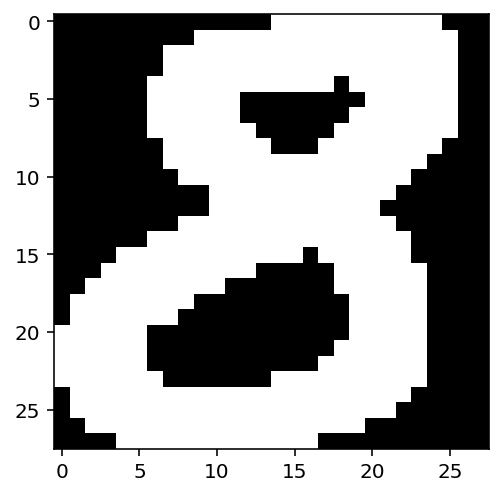

In [123]:
#resize image

img_resized = cv2.resize(th,(28,28),interpolation= cv2.INTER_AREA)

ret, otsu = cv2.threshold(img_resized, 40, 255,cv2.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8)
dilated_text = cv2.dilate(otsu,kernel, iterations= 1)

plt.imshow(dilated_text, cmap='gray')

cv2.imwrite('test_7.jpg', dilated_text)

In [25]:

from PIL import Image
import joblib
from xgboost import XGBClassifier




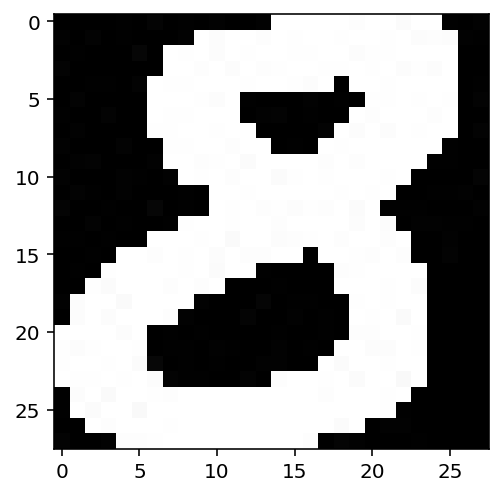

In [124]:
#reshaping img

img = Image.open('test_7.jpg')

plt.imshow(img, cmap='gray')






In [125]:
img_arr = np.array(img, dtype = int).flatten().reshape(1,784)

In [127]:
#model application

model = joblib.load('minst_XGboost.sav')


model.predict(img_arr)

array([3], dtype=int64)

In [114]:
#automated had written numbers prediction prediction
import numpy as np
import joblib
from xgboost import XGBClassifier
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


def num_prediction(path):
    
    model = joblib.load('minst_XGboost.sav')
    
    img = cv2.imread(path,0) 
    copy = img.copy()
    cropped_img = img[1450:2600,1000:1900]
    ret, th = cv2.threshold(cropped_img,100,255,cv2.THRESH_BINARY_INV)
    img_resized = cv2.resize(th,(28,28),interpolation= cv2.INTER_AREA)
    ret, otsu = cv2.threshold(img_resized, 10, 255,cv2.THRESH_BINARY)
    kernel = np.ones((3,3), np.uint8)
    dilated = cv2.dilate(otsu,kernel, iterations= 1)
    plt.imshow(dilated, cmap='gray')
    #prediction
    img_arr = dilated.flatten().reshape(1,784)
    
    return model.predict(img_arr)

array([7], dtype=int64)

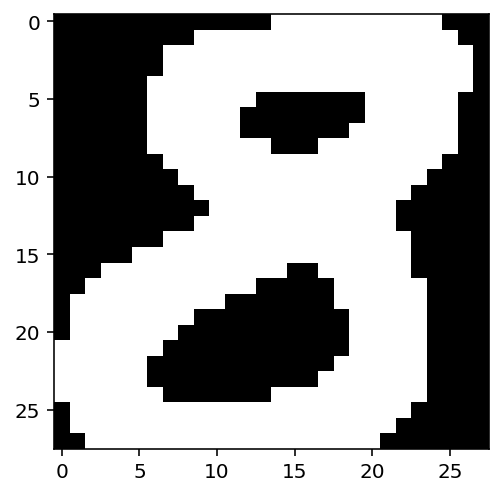

In [115]:
path = 'numbers/8.jpg'

num_prediction(path)

TypeError: Image data of dtype object cannot be converted to float

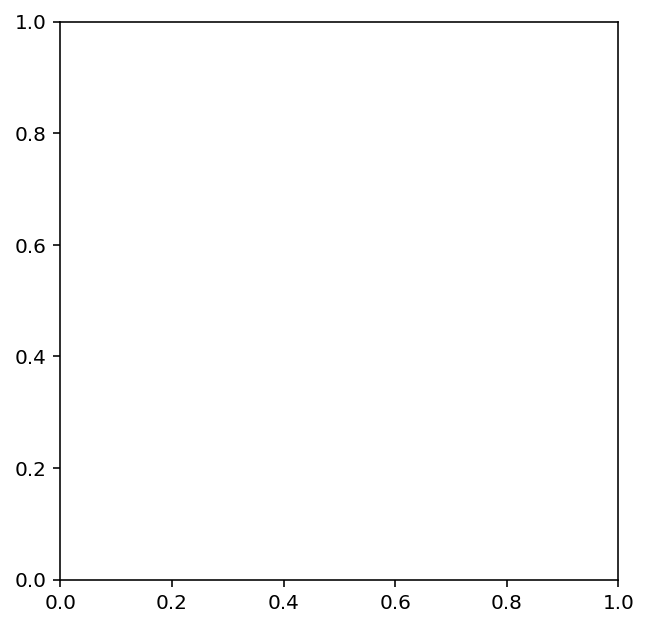

In [138]:
path = 'numbers/'
plt.figure(figsize=(5,20))
for i in range(2):
    img_read = cv2.imread(path + str(i) + '.jpg',0)
    plt.imshow(img_read, cmap='gray')

    

In [ ]:
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0

    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)
